## Project Goal: Student Alcohol Consumption Prediction
Patrycja Robak, Marta Rauch

#### Objective:
The primary objective of this project is to develop a predictive model that can accurately forecast the levels of alcohol consumption among high school students based on a comprehensive set of demographic, academic, and social factors. By leveraging data from the Student-Mat and Student-Por datasets, the project aims to identify key predictors and understand the underlying patterns and relationships between various student attributes and their alcohol consumption habits.

#### Specific Goals:
1. **Data Exploration and Cleaning:**
   - Conduct thorough data cleaning and preprocessing to handle missing values, outliers, and inconsistencies in both datasets.
   - Perform exploratory data analysis (EDA) to understand the distribution of alcohol consumption and other variables.

2. **Feature Engineering:**
   - Identify and engineer relevant features from the provided attributes that may have a significant impact on alcohol consumption.
   - Transform categorical variables into numerical formats suitable for machine learning algorithms.

3. **Predictive Modeling:**
   - Develop and compare various machine learning models to predict workday (Dalc) and weekend (Walc) alcohol consumption levels.
   - Implement and evaluate models such as linear regression, decision trees, random forests, support vector machines, and neural networks.

4. **Model Evaluation:**
   - Use appropriate evaluation metrics (e.g., RMSE, MAE, R-squared, classification accuracy) to assess the performance of the predictive models.
   - Conduct cross-validation and hyperparameter tuning to optimize model performance.

5. **Interpretation and Insights:**
   - Analyze the importance of different features and their impact on the predictions.
   - Provide insights into which factors are most strongly associated with higher levels of alcohol consumption among students.

6. **Recommendations and Applications:**
   - Based on the model's findings, offer recommendations for educators, parents, and policymakers to help mitigate high alcohol consumption levels among students.
   - Discuss potential applications of the predictive model in real-world scenarios, such as early intervention programs and personalized student support systems.

#### Data Overview:
The datasets include detailed information on students' demographics, academic performance, family background, and social behaviors. Key attributes include:

- **Demographic Information:** Age, sex, address, family size, parents' cohabitation status.
- **Parental Background:** Parents' education level and occupation.
- **Academic Performance:** Grades (G1, G2, G3), study time, past class failures, school support.
- **Social and Behavioral Factors:** Free time, going out with friends, extra-curricular activities, internet access, romantic relationships.
- **Family and Health:** Quality of family relationships, health status, school absences.

#### Anticipated Challenges:
- Handling imbalanced data if certain levels of alcohol consumption are underrepresented.
- Ensuring the model's generalizability across different student populations and schools.
- Interpreting the complex interactions between various predictors and their influence on alcohol consumption.

#### Expected Outcomes:
- A robust predictive model capable of estimating students' alcohol consumption levels with high accuracy.
- Detailed insights into the factors influencing student alcohol consumption, facilitating targeted interventions.
- A comprehensive report and visualization of findings to support data-driven decision-making in educational and policy contexts.

By achieving these goals, the project aims to contribute valuable knowledge to the understanding of alcohol consumption patterns among high school students and support efforts to promote healthier lifestyles and academic success.

## Loading packages

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pylab as pl
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

## Dataset

**Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:**

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93) 




**These grades are related with the course subject, Math or Portuguese:**

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)


We'll only use student-por dataset.

In [60]:
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4.0,at_home,teacher,...,4.0,3.0,4,1.0,1.0,3,4.0,0.0,11.0,11.0
1,GP,F,17,U,GT3,T,1,1.0,at_home,other,...,5.0,3.0,3,1.0,1.0,3,2.0,9.0,11.0,11.0
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,...,4.0,3.0,2,2.0,3.0,3,6.0,12.0,13.0,12.0
3,GP,F,15,U,GT3,T,4,2.0,health,services,...,3.0,2.0,2,1.0,1.0,5,0.0,14.0,14.0,14.0
4,GP,F,16,U,GT3,T,3,3.0,other,other,...,4.0,3.0,2,1.0,2.0,5,0.0,11.0,13.0,13.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      689 non-null    object 
 1   sex         689 non-null    object 
 2   age         689 non-null    int64  
 3   address     689 non-null    object 
 4   famsize     689 non-null    object 
 5   Pstatus     689 non-null    object 
 6   Medu        689 non-null    int64  
 7   Fedu        688 non-null    float64
 8   Mjob        689 non-null    object 
 9   Fjob        689 non-null    object 
 10  reason      689 non-null    object 
 11  guardian    687 non-null    object 
 12  traveltime  686 non-null    float64
 13  studytime   687 non-null    float64
 14  failures    689 non-null    int64  
 15  schoolsup   689 non-null    object 
 16  famsup      689 non-null    object 
 17  paid        689 non-null    object 
 18  activities  688 non-null    object 
 19  nursery     689 non-null    o

This DataFrame contains data from 679 entries across 33 columns. The columns represent various attributes such as school, gender, age, family background, academic performance, and health status of students. It appears that some columns have missing values, indicated by the difference in non-null counts across columns. Additionally, the data types include objects (e.g., strings) for categorical variables and integers/floats for numerical variables.

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,689.0,16.791001,1.429498,12.0,16.0,17.0,18.0,24.0
Medu,689.0,2.516691,1.139957,0.0,2.0,2.0,4.0,4.0
Fedu,688.0,2.308140,1.098281,0.0,1.0,2.0,3.0,4.0
traveltime,686.0,1.586006,0.770274,1.0,1.0,1.0,2.0,4.0
studytime,687.0,1.931587,0.822235,1.0,1.0,2.0,2.0,4.0
failures,689.0,0.262700,0.655313,0.0,0.0,0.0,0.0,3.0
famrel,688.0,3.906977,0.960688,1.0,4.0,4.0,5.0,5.0
freetime,688.0,3.174419,1.046982,1.0,3.0,3.0,4.0,5.0
goout,689.0,3.146589,1.194826,1.0,2.0,3.0,4.0,5.0
Dalc,687.0,1.551674,0.970344,1.0,1.0,1.0,2.0,5.0


### Descriptive Summary of Variables

1. **Age:** Students are primarily falling between 16 and 18 years (mean = 16.75).
2. **Mother's Education (Medu):** The average education level of mothers ranges from 0 (no education) to 4 (higher education), with most mothers having education levels between 2 (5th to 9th grade) and 4 (higher education) (mean = 2.51).
3. **Father's Education (Fedu):** The average education level of fathers ranges from 0 (no education) to 4 (higher education), with most fathers having education levels between 1 (primary education) and 3 (secondary education) (mean = 2.31).
4. **Travel Time (traveltime):** Most students have short travel times to school. (mean = 1.59).
5. **Study Time (studytime):** Weekly study time ranges from 1 to 4 hours, with most students spending around 2 hours studying per week (mean = 1.93)..
6. **Failures (failures):** On average, students have experienced a small number of past class failures, with most having none (mean = 0.26).
7. **Family Relationships (famrel):** Students report good family relationships (mean = 3.90).
8. **Free Time (freetime):** Students have moderate free time (mean = 3.18).
9. **Going Out (goout):** Students often go out with friends (mean = 3.15).
10. **Workday Alcohol Consumption (Dalc):** Low workday alcohol consumption (mean = 1.55).
11. **Weekend Alcohol Consumption (Walc):** Moderate weekend alcohol consumption (mean = 2.30).
12. **Health:** Students report good health (mean = 4.19).
13. **Absences:** School absences vary widely (mean = 3.78).
14. **First Period Grade (G1):** Average first period grade is 11.16 out of 20.
15. **Second Period Grade (G2):** Average second period grade is 11.45 out of 20.
16. **Final Grade (G3):** Average final grade is 11.90 out of 20.


### Conclusions

The dataset comprises 679 students, predominantly aged between 16 and 18, with parents' education levels mainly spanning primary to secondary education. Academic performance falls within the mid-range, with average grades around 11-12 out of 20, alongside moderate study times and positive family relationships. While alcohol consumption is generally low on weekdays and moderate on weekends, students report good overall health status.

Looking at the descriptive statistics of this dataset, we could infer:

Average age of students is 16.

Avg. weekly study time of students is 2 hours approx.

Avg. grade obtained in 1st and 2nd period is 12 approx.

Avg. final grade obtained is 12 approx.

In [63]:
# student_por['label']="0"
# student_por.head()

In [64]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**A preliminary analysis on the dataset shows that:**

- There are 679 observations and 33 features.

- The features are of multiple datatypes.

- The dataset requires tidying.

- Missing values have been detected.

## EDA


### Barplots

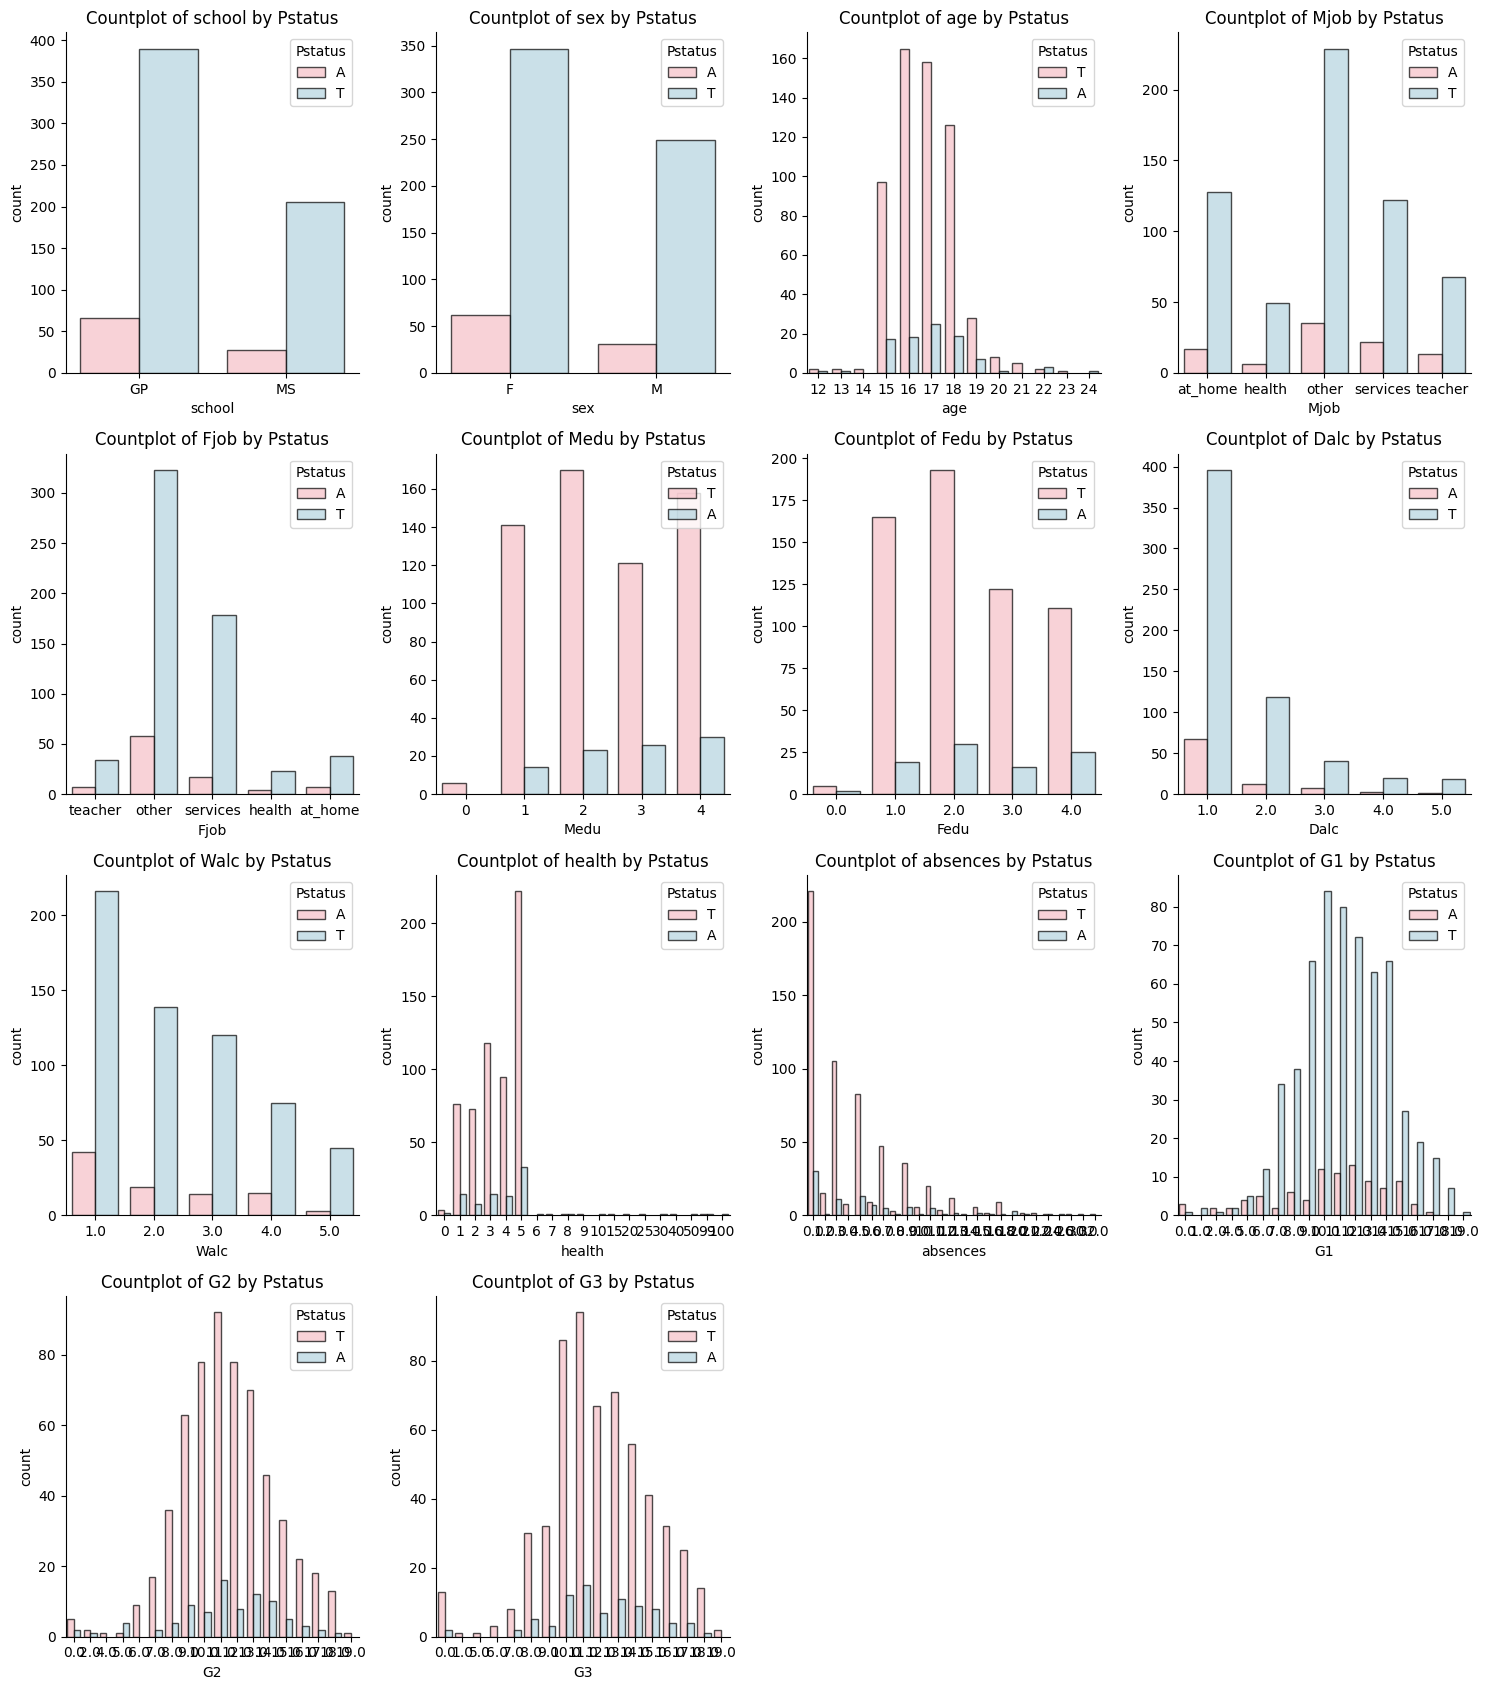

In [65]:
plt.figure(figsize=[15,17])
features_to_plot = ['school','sex','age','Mjob','Fjob','Medu','Fedu','Dalc','Walc','health','absences','G1','G2','G3']
for i, feature in enumerate(features_to_plot, start=1):
    plt.subplot(4,4,i)
    sns.countplot(x=feature, hue='Pstatus', palette=['lightpink', 'lightblue'], edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {} by Pstatus".format(feature))

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### How many students in each school participated in the survey?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


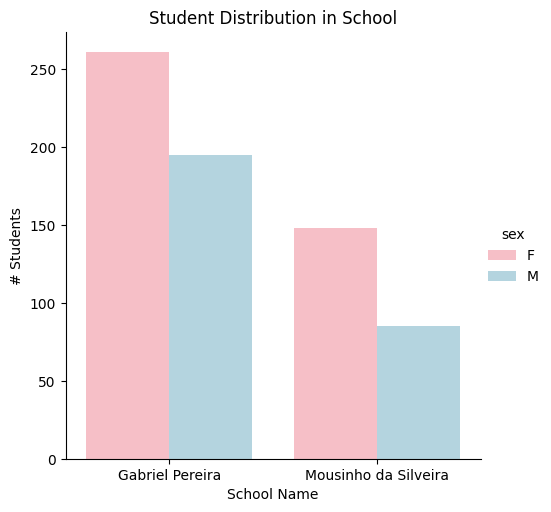

In [66]:
# Set up the plot
ax = sns.catplot(x='school', data=df, kind='count', hue='sex', palette=['lightpink', 'lightblue'])
plt.title('Student Distribution in School')
plt.xlabel('School Name')
plt.ylabel('# Students')
ax.set(xticklabels=["Gabriel Pereira", "Mousinho da Silveira"])
plt.show()

More no. of students who have participated in this survey are from Gabriel Pereira School.
Female students are higher in number than that of males.

### Are the students are of different age groups?

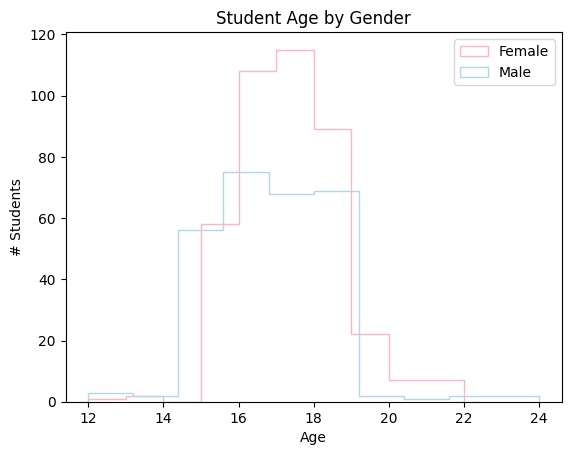

In [67]:
# Set up the plot
fig, ax = plt.subplots()
ax.hist(df.loc[(df['sex'] == 'F'), 'age'], color='lightpink', histtype='step', label='Female')
ax.hist(df.loc[(df['sex'] == 'M'), 'age'], color='lightblue', histtype='step', label='Male')
plt.title('Student Age by Gender')
plt.xlabel('Age')
plt.ylabel('# Students')
plt.legend()
plt.show()

### Does students' gender affect their scores?

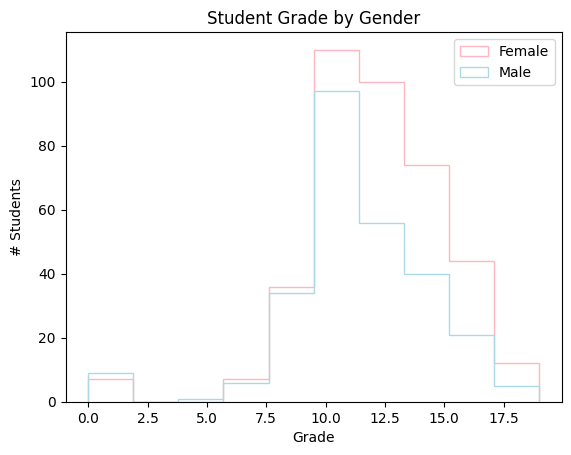

In [68]:
# Set up the plot
fig, ax = plt.subplots()
ax.hist(df.loc[(df['sex'] == 'F'), 'G3'], color='lightpink', histtype='step', label='Female')
ax.hist(df.loc[(df['sex'] == 'M'), 'G3'], color='lightblue', histtype='step', label='Male')
plt.title('Student Grade by Gender')
plt.xlabel('Grade')
plt.ylabel('# Students')
plt.legend()
plt.show()

Most of the female students have secured a good grade comparing to the male students. Let's check whether the average grade secured by female students is higher than than of male students.

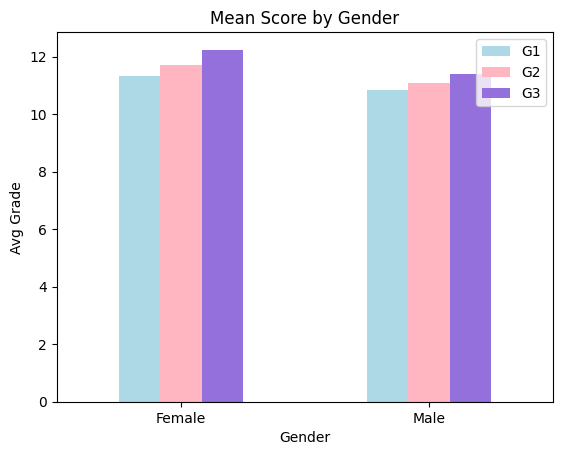

In [69]:
# Set up the plot
ax = df.groupby('sex')[['G1', 'G2', 'G3']].mean().plot(kind='bar', color=['lightblue', 'lightpink', 'mediumpurple'])
plt.title('Mean Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Grade')
plt.legend(loc='upper right')
ax.set_xticklabels(['Female', 'Male'], rotation=0)
plt.show()

As expected from the inference of previous graph, the mean score of female students are higher than that of male students.

### Does the education and job status of parents affect their child's grade?

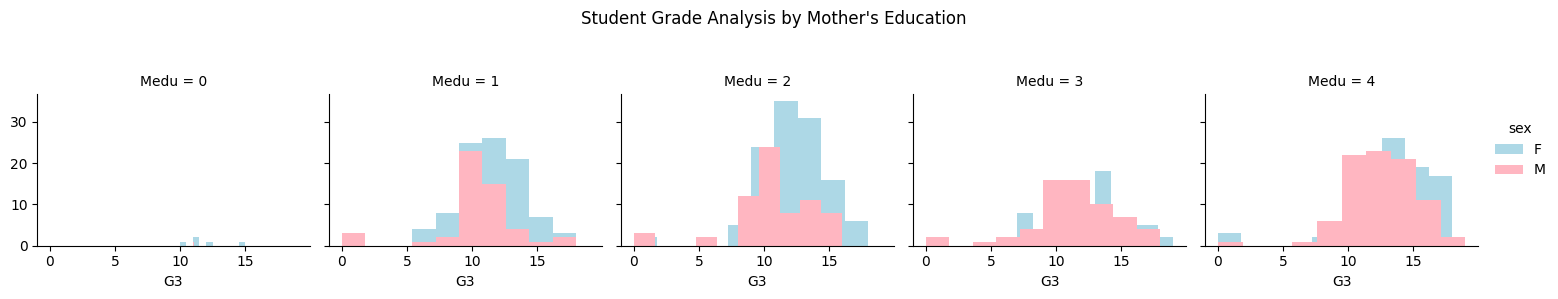

In [70]:
ax = sns.FacetGrid(df, col='Medu', hue='sex', palette=['lightblue', 'lightpink', 'mediumpurple'])
ax.map(plt.hist, 'G3').add_legend()

# Set title and adjust subplot layout
ax.fig.suptitle("Student Grade Analysis by Mother's Education")
plt.subplots_adjust(top=0.7)

# Show the plot
plt.show()

In [71]:
df.groupby('Medu')['G3'].mean()

Medu
0    11.666667
1    10.816327
2    11.657754
3    11.907143
4    13.055866
Name: G3, dtype: float64

There is no direct relationship observed between the mother's education status and student's grade.
As we could see from the graph, students of least educated mothers have also secured good grades whereas students of highly educated mothers have secured less grades.
Considering the average grade, students of highly educated mothers have scored high.

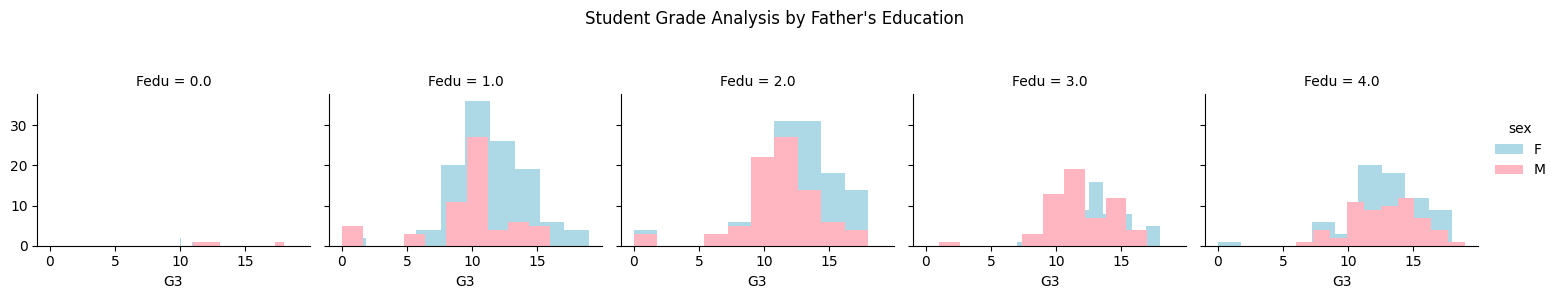

In [72]:
ax = sns.FacetGrid(df, col='Fedu', hue='sex', palette=['lightblue', 'lightpink', 'mediumpurple'])
ax.map(plt.hist, 'G3').add_legend()

# Add title and adjust layout
ax.fig.suptitle("Student Grade Analysis by Father's Education")
plt.subplots_adjust(top=0.7)

# Show plot
plt.show()

In [73]:
df.groupby('Fedu')['G3'].mean()

Fedu
0.0    12.142857
1.0    10.949438
2.0    11.801887
3.0    12.363636
4.0    12.892308
Name: G3, dtype: float64

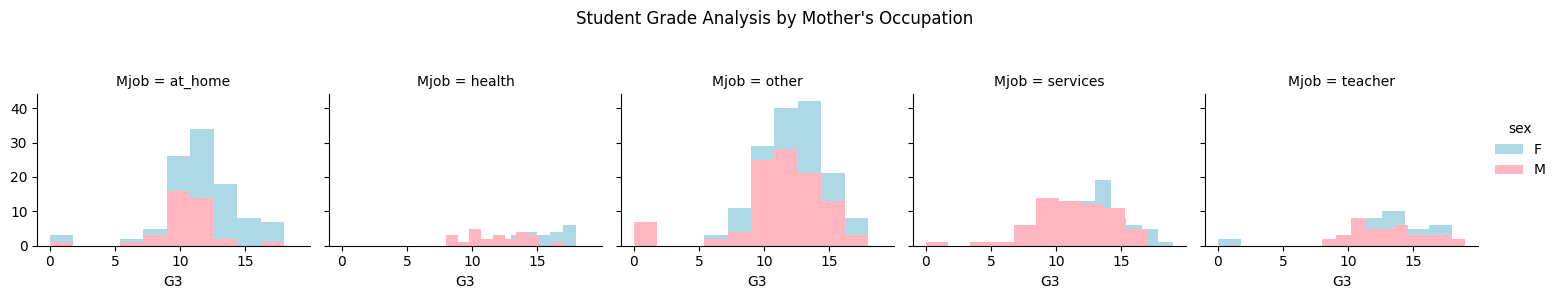

In [74]:
ax = sns.FacetGrid(df, col='Mjob', hue='sex', palette=['lightblue', 'lightpink', 'mediumpurple'])
ax.map(plt.hist, 'G3').add_legend()

# Add title and adjust layout
ax.fig.suptitle("Student Grade Analysis by Mother's Occupation")
plt.subplots_adjust(top=0.7)

# Show plot
plt.show()

In [75]:
df.groupby('Mjob')['G3'].mean()

Mjob
at_home     11.056738
health      13.100000
other       11.664093
services    12.138686
teacher     13.138889
Name: G3, dtype: float64

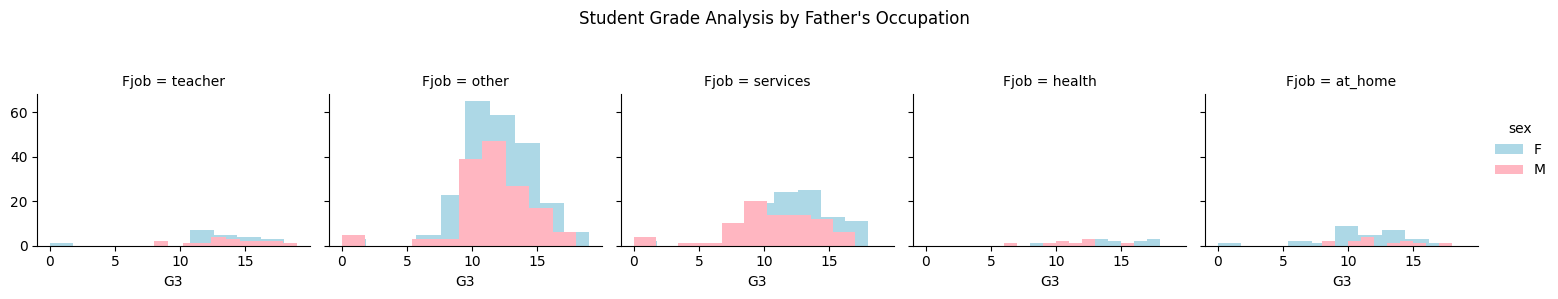

In [76]:
ax = sns.FacetGrid(df, col='Fjob', hue='sex', palette=['lightblue', 'lightpink', 'mediumpurple'])
ax.map(plt.hist, 'G3').add_legend()

# Add title and adjust layout
ax.fig.suptitle("Student Grade Analysis by Father's Occupation")
plt.subplots_adjust(top=0.7)

# Show plot
plt.show()

In [77]:
df.groupby('Fjob')['G3'].mean()

Fjob
at_home     11.428571
health      12.565217
other       11.879357
services    11.655738
teacher     13.447368
Name: G3, dtype: float64

### Do students who travel more tend to study less?

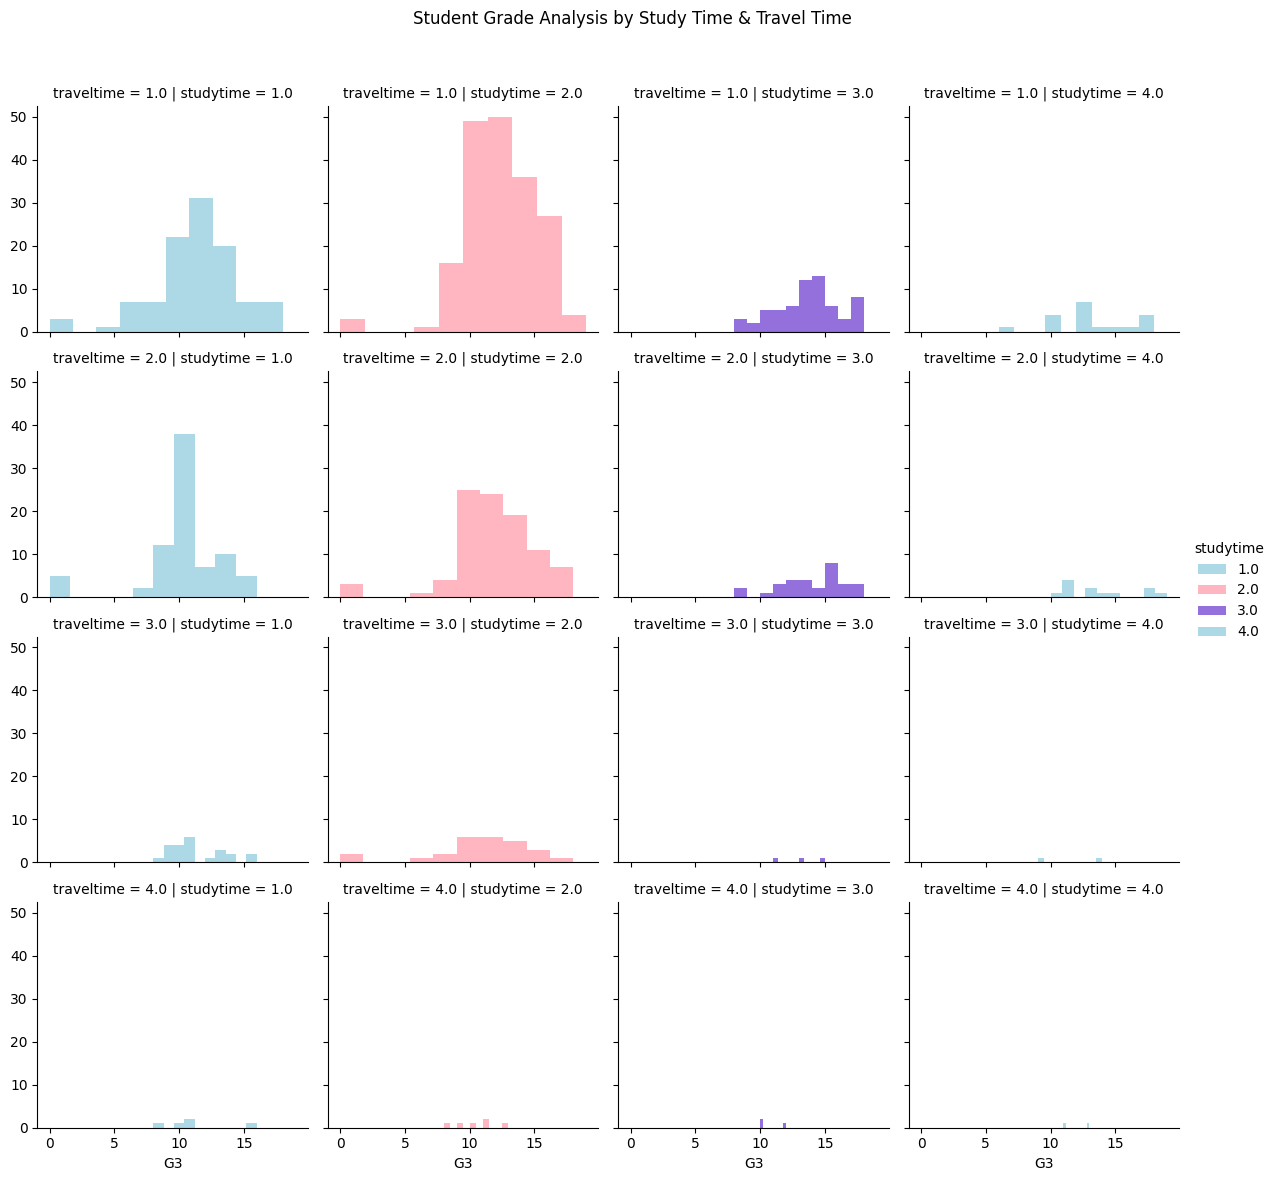

In [78]:
# Set up the FacetGrid
ax = sns.FacetGrid(df, col='studytime', row='traveltime', hue='studytime', palette=['lightblue', 'lightpink', 'mediumpurple'])
ax.map(plt.hist, 'G3').add_legend()

# Add title and adjust layout
ax.fig.suptitle("Student Grade Analysis by Study Time & Travel Time")
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()

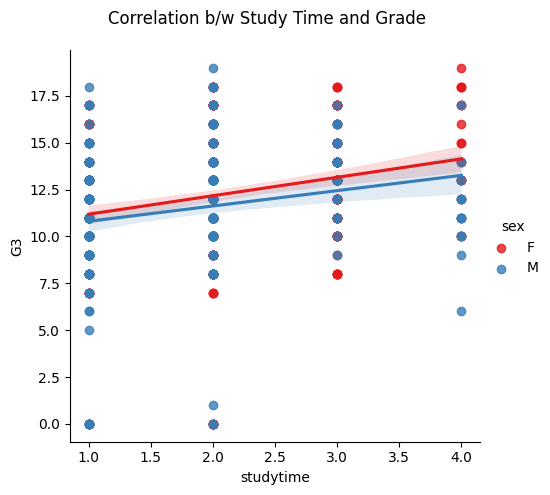

In [79]:
ax = sns.lmplot(x = 'studytime',y = 'G3', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Study Time and Grade')
plt.subplots_adjust(top = 0.9)

This seems to be interesting. Let me jot down the inferences derived out of this graph.

Students who travel more than 2 hours is less in number.
Students who travel for more than 2 hours are spending less time to study.
Students who travel less than 2 hours have mixed preferences in their study pattern. There are few students who use this time to study for more hours, but most of them study for less than 2 hours.
As expected, study time is influencing the grade. Students whose study time is more were able to secure a good grade.

### Do the students prefer hanging out during their freetime?

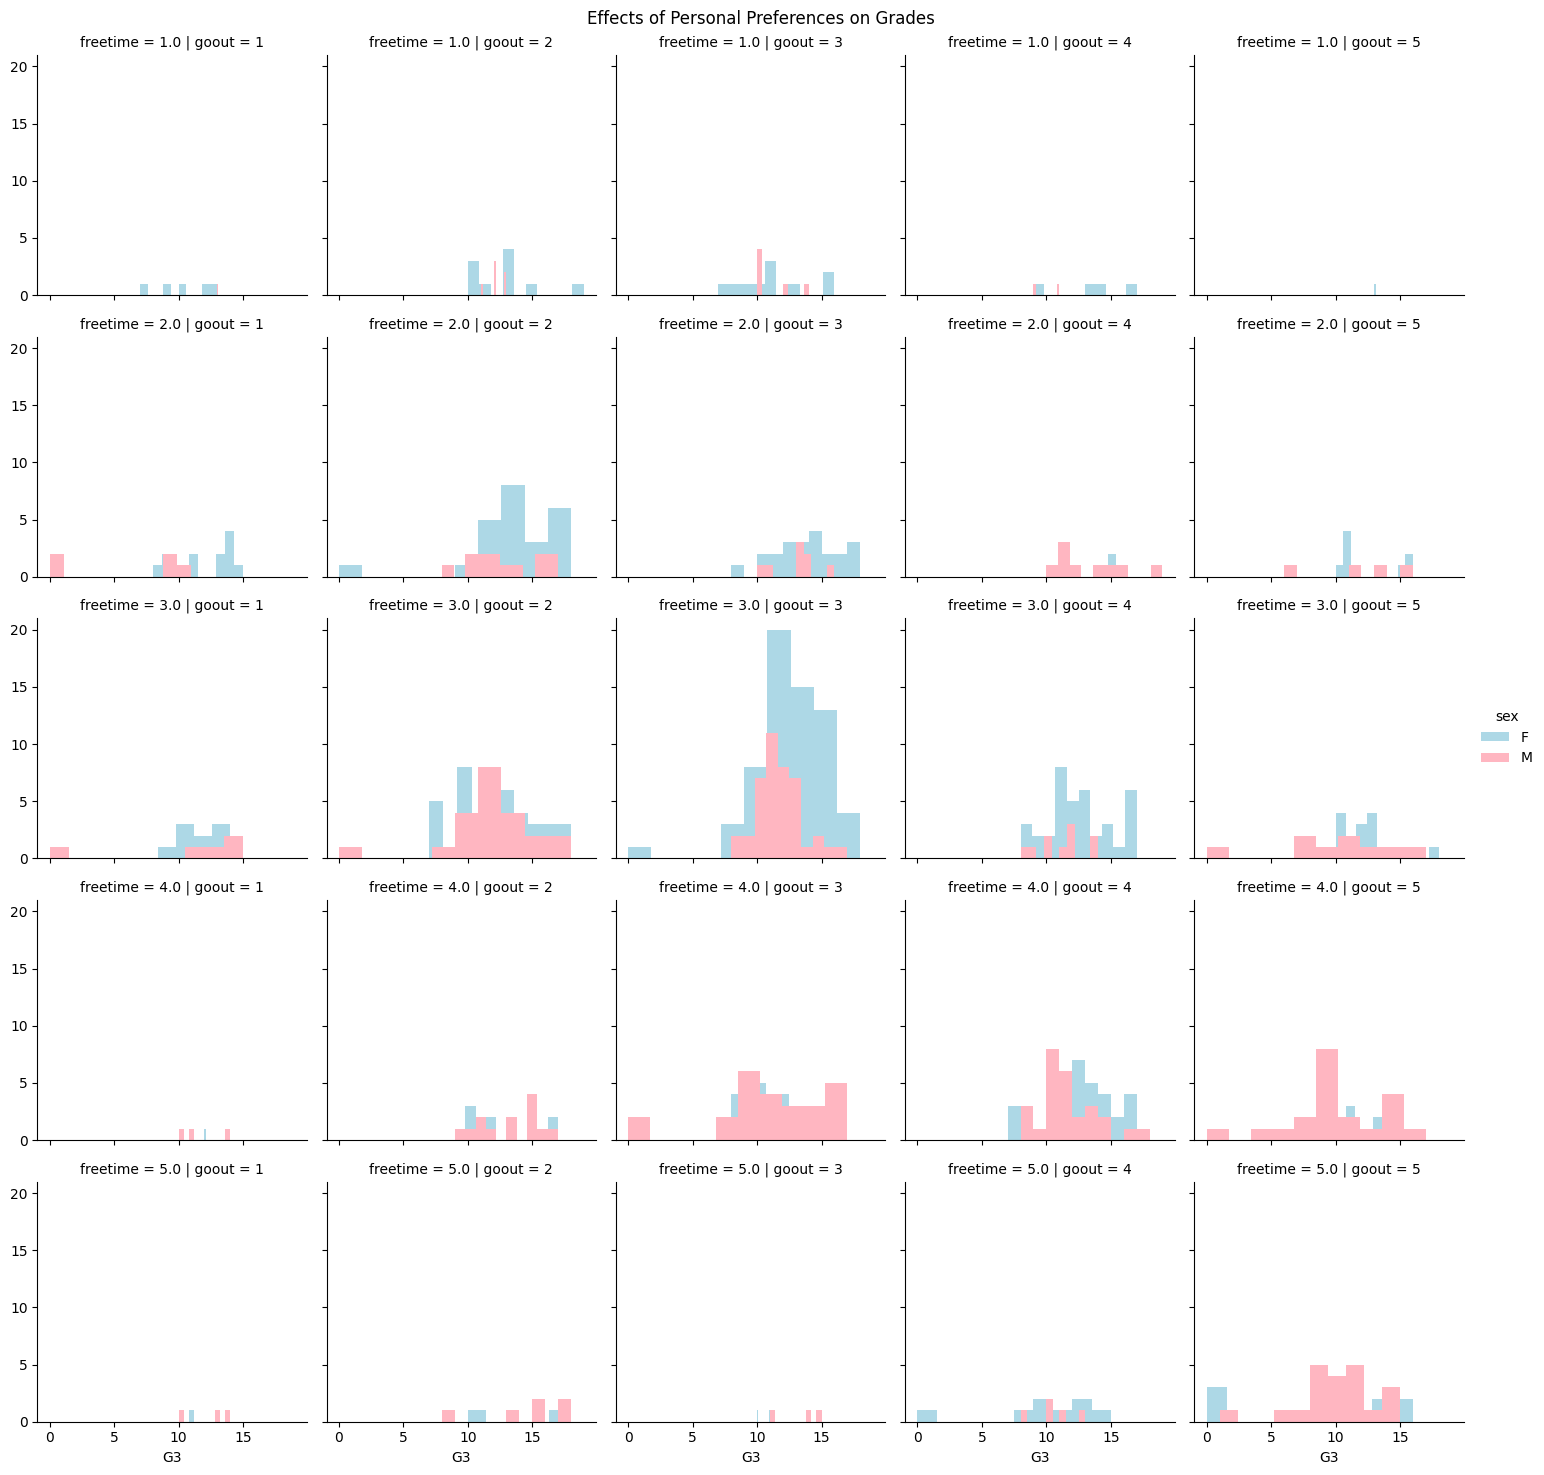

In [80]:
ax = sns.FacetGrid(df, col='goout', row='freetime', hue='sex', palette=['lightblue', 'lightpink', 'mediumpurple'])
ax.map(plt.hist, 'G3').add_legend()

# Add title and adjust layout
ax.fig.suptitle("Effects of Personal Preferences on Grades")
plt.subplots_adjust(top=0.95)

# Show plot
plt.show()

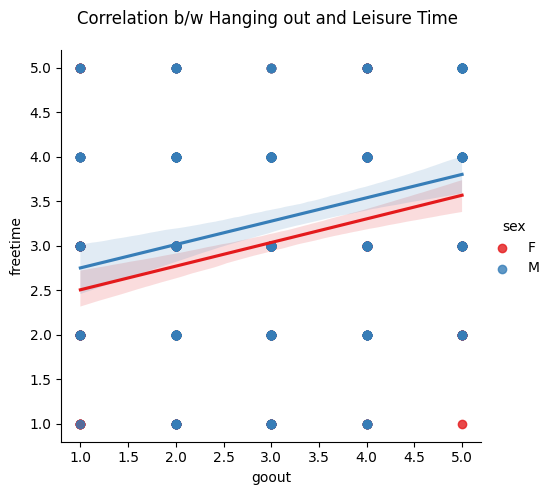

In [81]:
ax = sns.lmplot(x = 'goout',y = 'freetime', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Hanging out and Leisure Time')
plt.subplots_adjust(top = 0.9)

### Is alcohol consumption influencing student's grade?

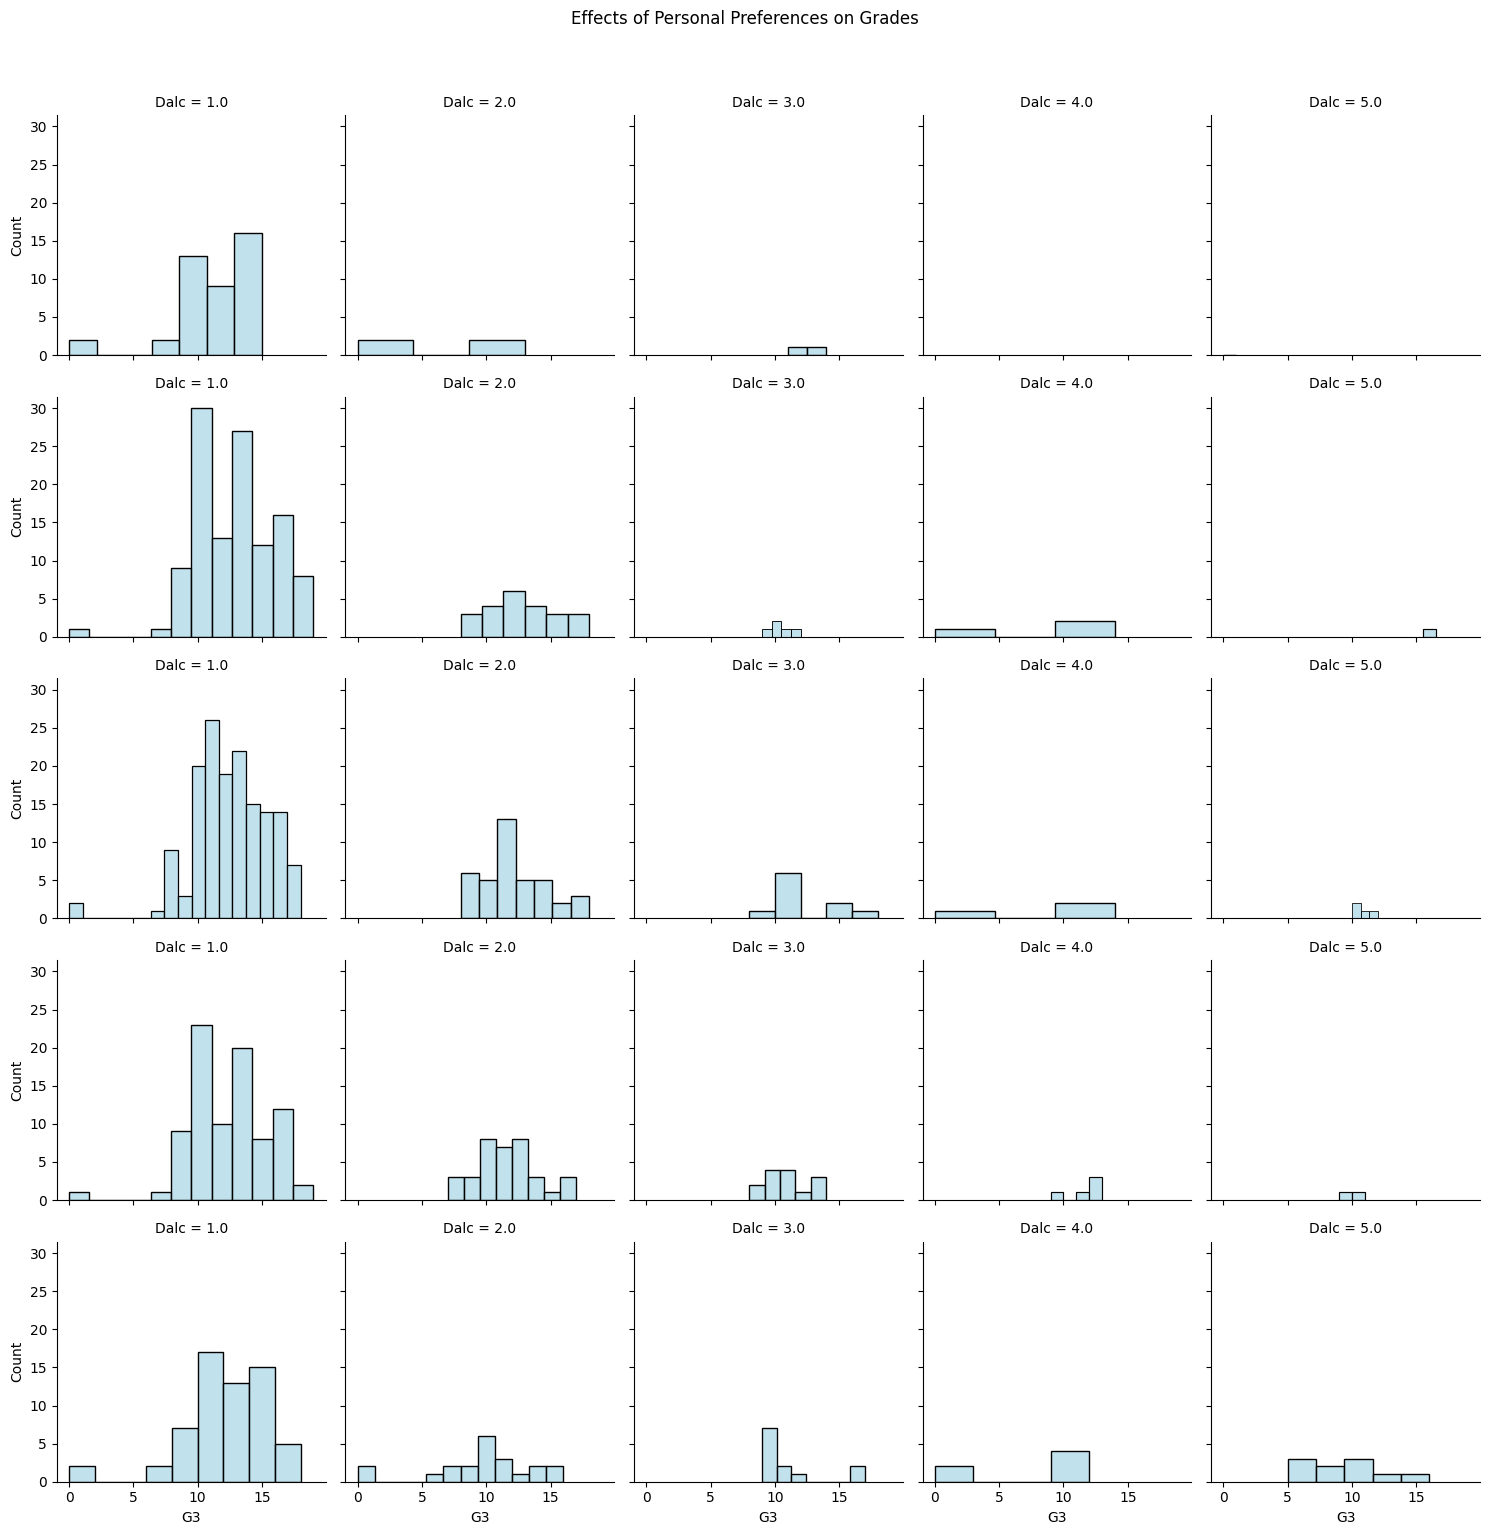

In [82]:
# Set up the FacetGrid
g = sns.FacetGrid(df, col='Dalc', row='goout')
g.map(sns.histplot, 'G3', color='lightblue')
g.set_titles('Dalc = {col_name}')
g.fig.suptitle("Effects of Personal Preferences on Grades", y=1.02)
plt.subplots_adjust(top=0.95)

# Show plot
plt.show()

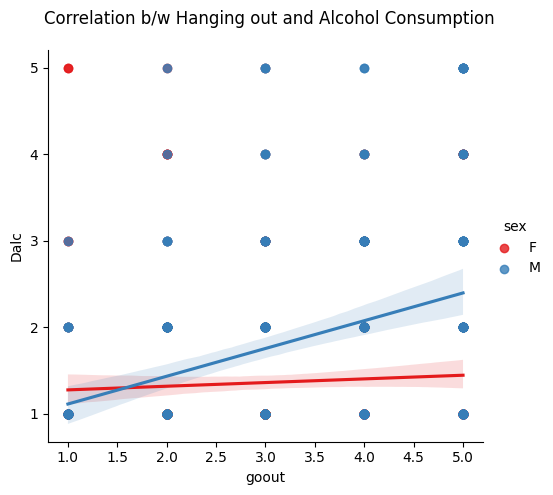

In [83]:
ax = sns.lmplot(x = 'goout',y = 'Dalc', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Hanging out and Alcohol Consumption')
plt.subplots_adjust(top = 0.9)

Correlation between hanging out and consuming alcohol is different for each of the genders.
Male Students who hang out more frequently consume more alcohol whereas it is not the same for female students.
But this is not affecting their grades.

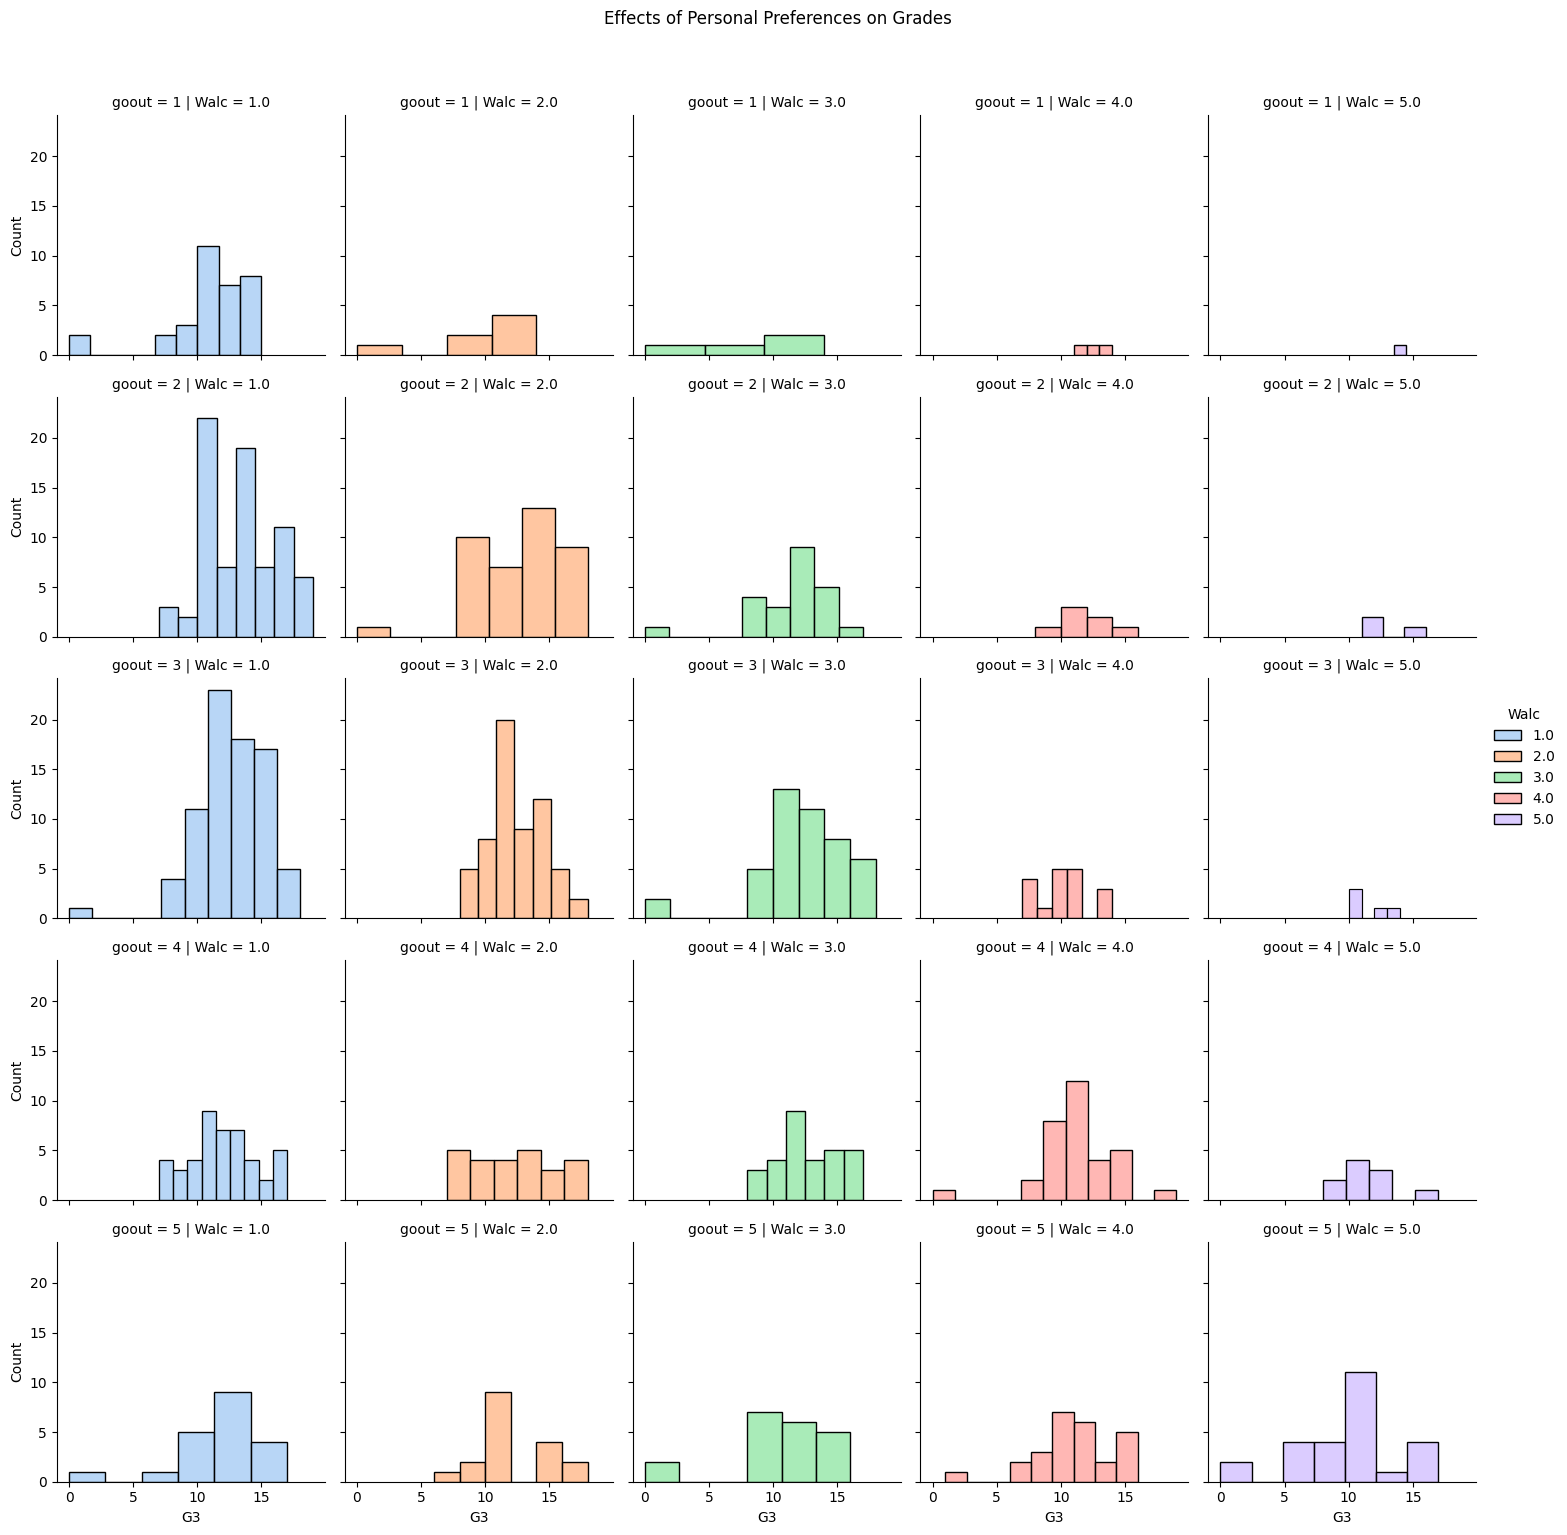

In [84]:
# Set up the FacetGrid
g = sns.FacetGrid(df, col='Walc', row='goout', hue='Walc', palette='pastel')
g.map(sns.histplot, 'G3')
g.add_legend()

# Add title and adjust layout
g.fig.suptitle("Effects of Personal Preferences on Grades", y=1.02)
plt.subplots_adjust(top=0.95)

# Show plot
plt.show()

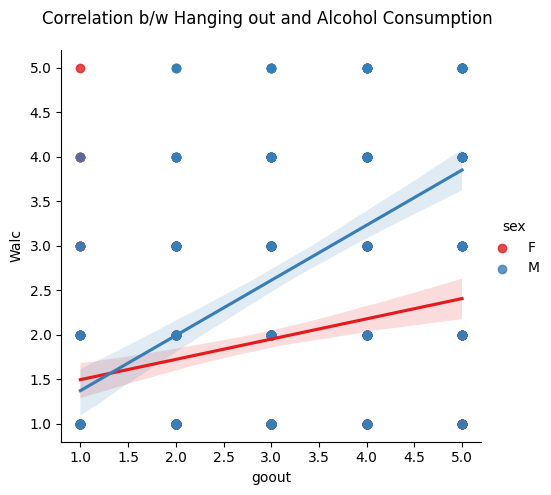

In [85]:
ax = sns.lmplot(x = 'goout',y = 'Walc', hue = 'sex', data = df, palette = 'Set1')
ax.fig.suptitle('Correlation b/w Hanging out and Alcohol Consumption')
plt.subplots_adjust(top = 0.9)

### Correlation check

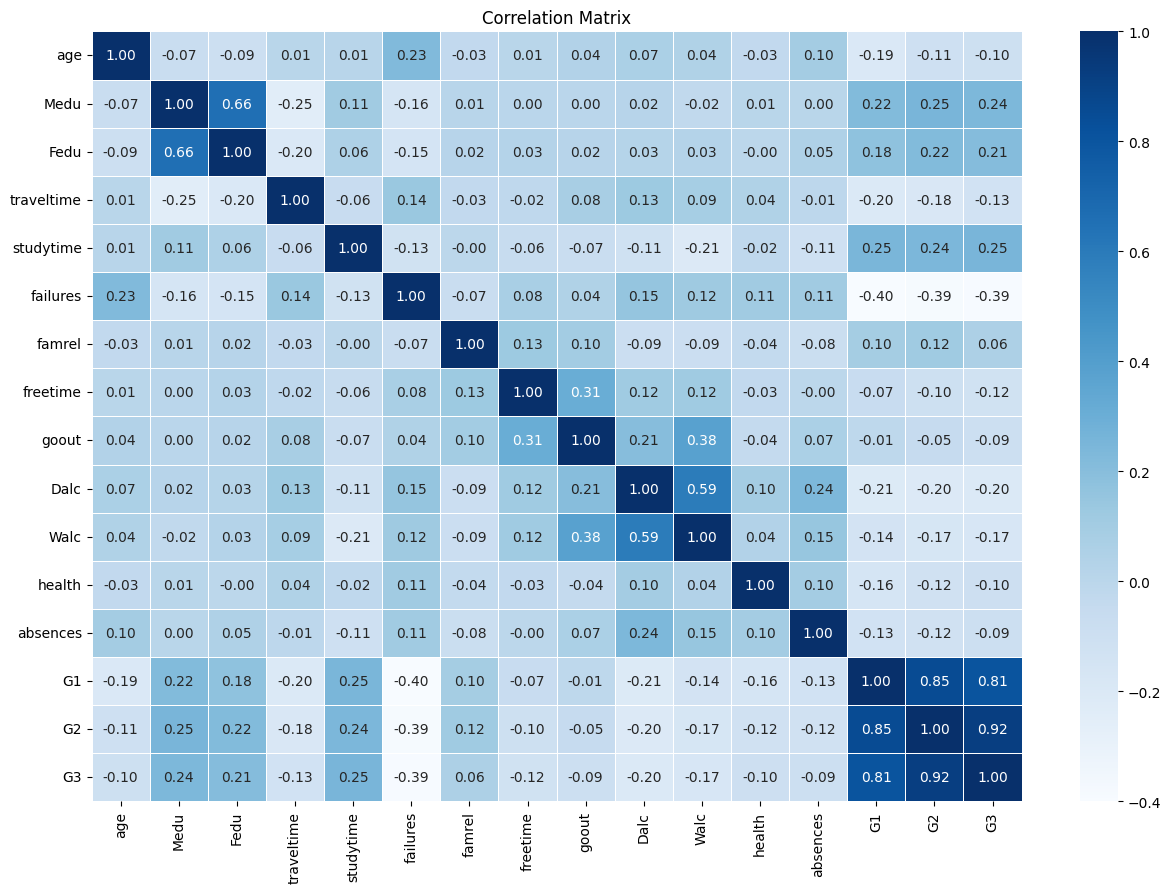

In [86]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing


## Zero values

In this step, we perform an initial analysis to identify which columns contain missing values within our dataset. By quantifying the number of missing values in each column, we can better understand the extent of incomplete data. Accurately addressing missing values is essential to maintain the integrity and reliability of the subsequent machine learning models.

In [87]:
# Checking for missing values in each column

missing_values_count = df.isna().sum()

print("Missing Values Count per Column:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Missing Values Count per Column:
school: 0
sex: 0
age: 0
address: 0
famsize: 0
Pstatus: 0
Medu: 0
Fedu: 1
Mjob: 0
Fjob: 0
reason: 0
guardian: 2
traveltime: 3
studytime: 2
failures: 0
schoolsup: 0
famsup: 0
paid: 0
activities: 1
nursery: 0
higher: 0
internet: 0
romantic: 0
famrel: 1
freetime: 1
goout: 0
Dalc: 2
Walc: 1
health: 0
absences: 1
G1: 1
G2: 18
G3: 30


**Results:**
The missing values count per column shows that the majority of columns have no missing data. However, a few columns have some missing values: 'Fedu' has one missing value, 'guardian' and 'traveltime' each have two missing values, 'studytime', 'activities', 'Dalc', 'Walc', and 'G1' have one missing value each, 'G2' has eighteen missing values, and 'G3' has thirty missing values.

In [88]:
# Check how many records have at least one missing value
records_with_missing_values = df.isnull().any(axis=1).sum()
print("Number of records with at least one missing value:", records_with_missing_values)

Number of records with at least one missing value: 35


To gain a clearer understanding of the distribution of missing values, we can utilize visualization methods.

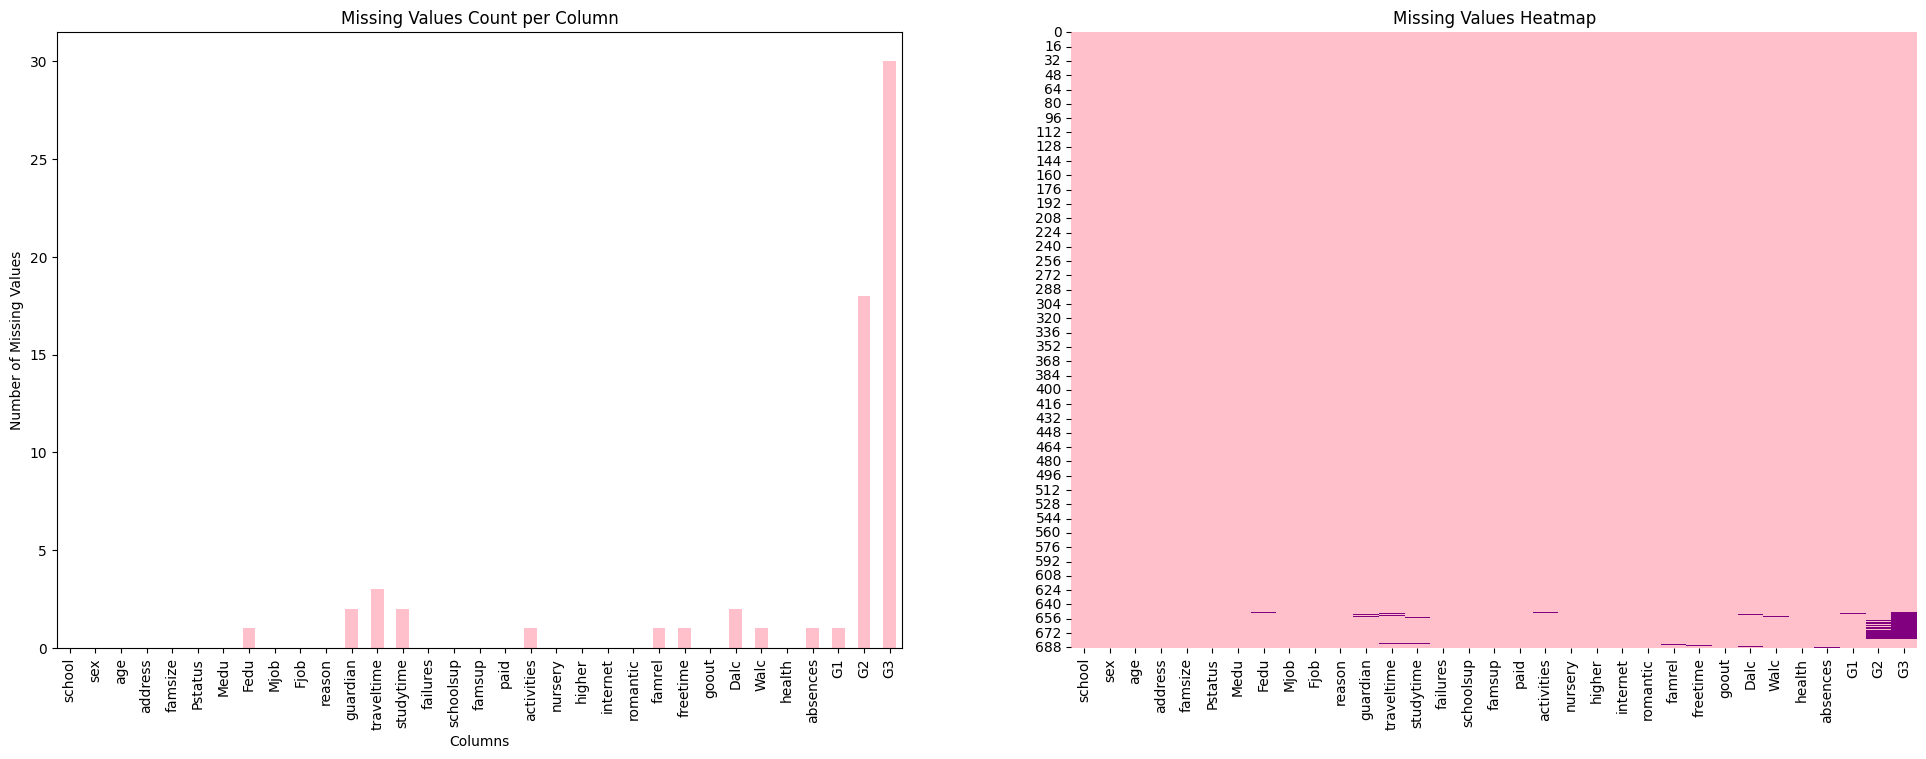

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

missing_values_count.plot(kind='bar', ax=ax1, color='pink')
ax1.set_title('Missing Values Count per Column')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Number of Missing Values')

sns.heatmap(df.isna(), cbar=False, cmap=sns.color_palette(["#FFC0CB", "#800080"]), ax=ax2)
ax2.set_title('Missing Values Heatmap')

# Display the plots
plt.show()

The heatmap and bar plot of missing values provides a visual representation of where missing values are located in the dataset.

We shall now proceed with the removal of records containing missing values, thereby ensuring the integrity and completeness of our dataset.

In [90]:
# Remove rows with missing values
df = df.dropna()

# Verify that missing values are removed
missing_values_after_removal = df.isna().sum()
missing_values_after_removal

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We have successfully addressed the missing values, ensuring that the dataset is now complete.

## Checking for Duplicates

In this step, we identify and remove duplicate rows from the dataset. Duplicate data can introduce bias and inaccuracies in the analysis and machine learning models, so it's important to ensure that each record in the dataset is unique.

In [91]:
# Identify duplicate rows
duplicate_rows = df.duplicated()

# Count duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

df = df.drop_duplicates()

Number of duplicate rows: 0


The dataset has been checked for duplicates, and no duplicate rows were found.

## Outliers

Now we are identifying outliers in numerical columns of the DataFrame using an enhanced method that combines both the **Interquartile Range (IQR)** and     
**Z-score techniques**. 

The function 'detect_outliers_enhanced' calculates the outliers for each numerical column by first computing the IQR-based outliers, then the Z-score-based outliers, and finally combining the results. This approach ensures a comprehensive detection of outliers, contributing to a more robust analysis of the dataset.

In [92]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

def detect_outliers_enhanced(df, iqr_factor=1.5, z_threshold=3):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_factor * IQR
        upper_bound = Q3 + iqr_factor * IQR
        
        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        z_scores = np.abs(stats.zscore(df[col]))
        z_outliers = df[(z_scores > z_threshold)][col]
        
        combined_outliers = pd.concat([iqr_outliers, z_outliers]).drop_duplicates()
        outliers[col] = combined_outliers
    return outliers

outliers_enhanced = detect_outliers_enhanced(df)

Visualizing the outliers can provide a better understanding of their distribution and impact on the dataset. Box plots are useful for this purpose.

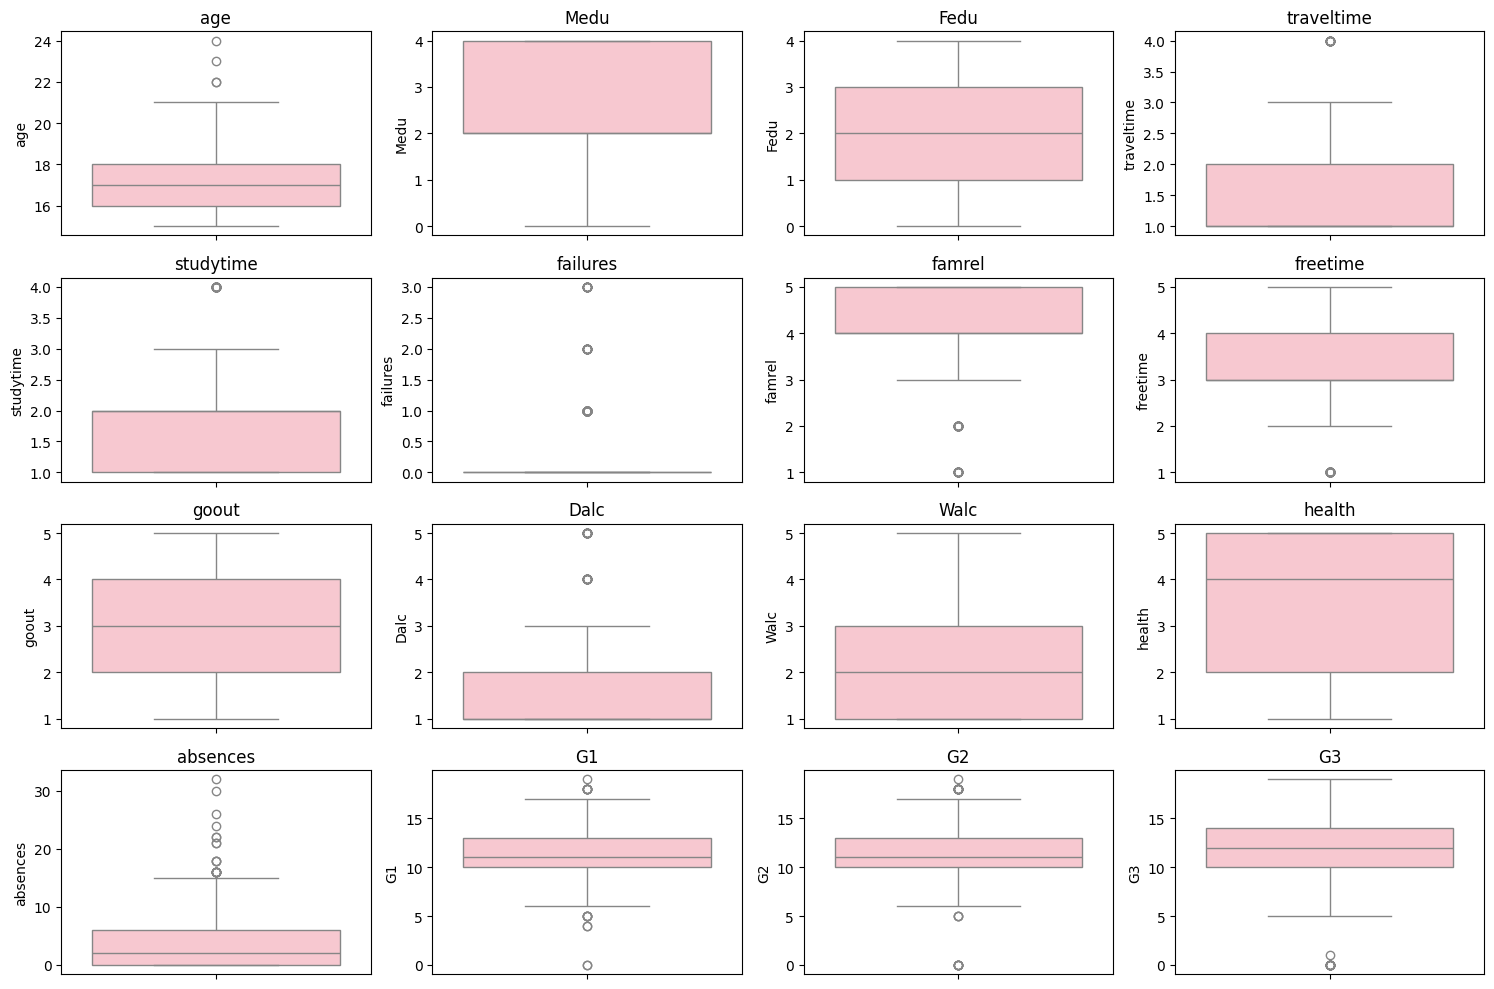

In [93]:
# Visualize outliers with box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column], color='pink')
    plt.title(column)
plt.tight_layout()
plt.show()

Box plots show the distribution of numerical data and highlight the median, quartiles, and potential outliers.
Any points outside the "whiskers" are considered potential outliers.

After defining the outlier detection methods, we proceed to create a function that prints outlier reports, facilitating a comprehensive overview of detected outliers across numerical columns in the dataset. This step enhances the interpretability of outlier detection results, aiding in further analysis and decision-making

In [94]:
# Function to print outliers
def print_outlier_report(outliers_dict):
    col_width = 40  # Column width for printing
    num_cols = 3    # Number of columns to display side by side
    outlier_reports = []

    for col, outliers in outliers_dict.items():
        if not outliers.empty:
            report = f"Outliers detected in {col}:\n{outliers.describe().to_string()}"
            outlier_reports.append(report)

    for i in range(0, len(outlier_reports), num_cols):
        row = outlier_reports[i:i+num_cols]
        for line in range(max(len(report.split('\n')) for report in row)):
            for report in row:
                split_report = report.split('\n')
                if line < len(split_report):
                    print(split_report[line].ljust(col_width), end=" ")
                else:
                    print("".ljust(col_width), end=" ")
            print()

# Print outlier report
print_outlier_report(outliers_enhanced)

Outliers detected in age:                Outliers detected in traveltime:         Outliers detected in studytime:          
count     4.000000                       count    1.0                             count    1.0                             
mean     22.500000                       mean     4.0                             mean     4.0                             
std       1.290994                       std      NaN                             std      NaN                             
min      21.000000                       min      4.0                             min      4.0                             
25%      21.750000                       25%      4.0                             25%      4.0                             
50%      22.500000                       50%      4.0                             50%      4.0                             
75%      23.250000                       75%      4.0                             75%      4.0                             
max     

The dataset reveals several notable anomalies. Some students are significantly older, travel much longer distances, and spend more time studying than their peers. There are also students who consistently fail subjects, report poor family relationships, have minimal free time, and consume higher levels of alcohol daily. Additionally, some students have excessive absences and show extreme variations in their grades, indicating a wide disparity in academic performance.

In [95]:
# Function to remove outliers carefully
def remove_outliers_enhanced(df, outliers_dict):
    for col, outliers in outliers_dict.items():
        if not outliers.empty:
            df = df[~df.index.isin(outliers.index)]
    return df

# Remove outliers from the dataset using the enhanced method
df = remove_outliers_enhanced(df, outliers_enhanced)

# Checking if everything is in order
print("\nCleaned dataset summary:")
print(df.describe())

# Displaying the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df.head())


Cleaned dataset summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  621.000000  621.000000  621.000000  621.000000  621.000000  621.000000   
mean    16.747182    2.505636    2.296296    1.576490    1.935588    0.201288   
std      1.229547    1.136797    1.098005    0.750931    0.822490    0.564885   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  621.000000  621.000000  621.000000  621.000000  621.000000  621.000000   
mean     3.942029    3.173913    3.177134    1.470209    2.254428    3.547504   
s

## Feature Engineering

#### Create new features

- **avg_grade**, which is the average of the grades G1, G2, and G3. This feature represents the student's average grade, which might have an impact on their alcohol consumption habits.

- **total_alcohol**, which is the sum of Dalc (weekday alcohol consumption) and Walc (weekend alcohol consumption). This feature represents the total alcohol consumption of the student.

In [96]:
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df['total_alcohol'] = df['Dalc'] + df['Walc']

In [97]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,total_alcohol
1,GP,F,17,U,GT3,T,1,1.0,at_home,other,...,3,1.0,1.0,3,2.0,9.0,11.0,11.0,10.333333,2.0
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,...,2,2.0,3.0,3,6.0,12.0,13.0,12.0,12.333333,5.0
3,GP,F,15,U,GT3,T,4,2.0,health,services,...,2,1.0,1.0,5,0.0,14.0,14.0,14.0,14.000000,2.0
4,GP,F,16,U,GT3,T,3,3.0,other,other,...,2,1.0,2.0,5,0.0,11.0,13.0,13.0,12.333333,3.0
5,GP,M,16,U,LE3,T,4,3.0,services,other,...,2,1.0,2.0,5,6.0,12.0,12.0,13.0,12.333333,3.0


**Data Transformation (One-Hot Encoding)**

In this step, we transform categorical variables into a numerical format that can be used by machine learning algorithms. We identify the categorical features in our dataset and use the OneHotEncoder from sklearn.preprocessing to convert these categorical values into binary columns. Each unique category in a feature gets its own binary column. After encoding, we combine these new binary columns with the remaining numerical features to create a comprehensive dataset that includes both numerical and transformed categorical data. This ensures that all relevant information is properly formatted for the machine learning model.

In [98]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                        'internet', 'romantic']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
encoded_categorical_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame with the encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with the rest of the features
numerical_features = df.drop(columns=categorical_features)
features_df = pd.concat([numerical_features, encoded_categorical_df], axis=1)


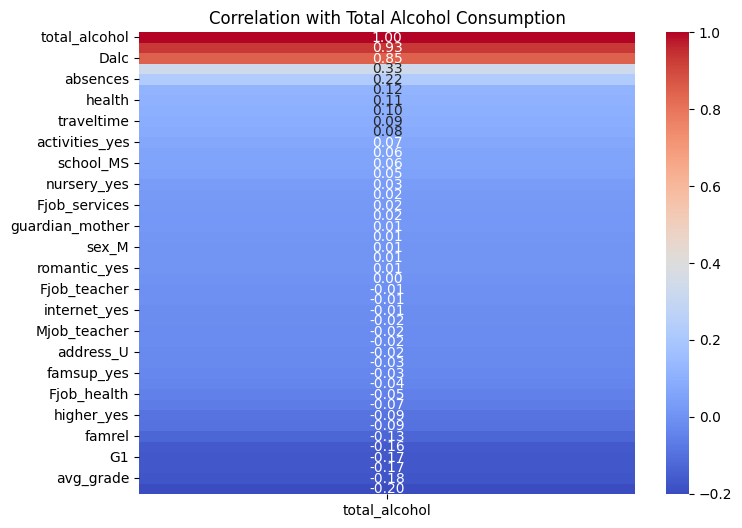

In [99]:
correlation_matrix = features_df.corr()
# Plot the correlation heatmap for `total_alcohol`
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['total_alcohol']].sort_values(by='total_alcohol', ascending=False), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation with Total Alcohol Consumption')
plt.show()

#### Handling Remaining Missing Values

In [100]:
from sklearn.impute import SimpleImputer

# Impute any remaining missing values
imputer = SimpleImputer(strategy='median')
features_df_imputed = pd.DataFrame(imputer.fit_transform(features_df), columns=features_df.columns)


**Spliting data** 

Data for training and testing To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 20%.

In [101]:
import random
random.seed(1234)

from sklearn.model_selection import train_test_split

# Separate the target variables
target = ['G3']
X = features_df_imputed.drop(columns=target)
Y = features_df_imputed[target]

# Split the data into training and test sets
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Principal Component Analysis (PCA)**

In [102]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(x_test)


## Models

### Random Forest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import random

# Assuming X_train_pca, Y_train, x_test_pca, and y_test are already defined

# Set the random seed for reproducibility
random.seed(1234)

# Create a regression model
model_reg = RandomForestRegressor()

# Fit the model
model_reg.fit(X_train_pca, Y_train.values.ravel())

# Evaluate the model
print("Random Forest Regressor R^2:", model_reg.score(x_test_pca, y_test))


Random Forest Regressor R^2: 0.8774837541680112


### Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

# Utworzenie pipeline'u dla Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor()

# Dopasowanie modelu
model_gbr.fit(X_train, Y_train.values.ravel())

# Ocena modelu
print("Gradient Boosting Regressor R^2:", model_gbr.score(x_test, y_test))


Gradient Boosting Regressor R^2: 0.9657372069960107


Similar to the issue with `RandomForestRegressor`, the `GradientBoostingRegressor` also expects the target variable \( Y \) to be a 1-dimensional array. You can resolve this issue by converting the pandas DataFrame to a NumPy array and then flattening it using the `.ravel()` method.

By using `Y_train.values.ravel()`, you convert the DataFrame `Y_train` to a NumPy array and then flatten it to the required shape. This should prevent the warning and fit the model correctly.